### Random forests
* Bagging과 유사하나 차이가 있음.

* Bagging은 어느 model이나 사용 가능하지만 random forest는 decision tree를 사용함.
* random forest는 개별 모델을 최적화 할 때 random으로 변수를 추출한다. 고 하는데 이게 bagging과 어떤 면에서 다른거지?

Therefore, random forests are using randomization on both axes of the data matrix:

by bootstrapping samples for each tree in the forest;

randomly selecting a subset of features at each node of the tree.

### A look at random forests

In [2]:
import pandas as pd

adult_census = pd.read_csv("data/adult-census.csv")
target_name = "class"
data = adult_census.drop(columns=[target_name, "education-num"])
target = adult_census[target_name]

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

preprocessor = make_column_transformer((categorical_encoder, make_column_selector(dtype_include=object)), remainder='passthrough')

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

tree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [9]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, data, target)

print(scores_tree)

[0.81717678 0.81400348 0.81726044 0.81992219 0.83005733]


In [10]:
from sklearn.ensemble import BaggingClassifier

bagged_trees = make_pipeline(preprocessor, BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=50, n_jobs=2, random_state=0))

In [11]:
scores_bagged_trees = cross_val_score(bagged_trees,data, target)

In [12]:
scores_bagged_trees

array([0.84327976, 0.84051592, 0.84131859, 0.85145373, 0.85309173])

### Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

random_forest = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=50,n_jobs=2, random_state=0))

score = cross_val_score(random_forest,data,target)

In [17]:
score

array([0.85075238, 0.84716962, 0.84684685, 0.85421785, 0.85677723])

### Details about default hyperparameters

max_features라는 hyperparameter는 표본 추출에 있어서 랜덤으로 추출하는 비율을 얼마만큼 설정할지를 조정한다.

random_forest의 hyperparameter를 게속 배워야할 듯

### Exercise

In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("data/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [154]:
# solution
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=3)
forest.fit(data_train, target_train)
target_predicted = forest.predict(data_test)
print(f"Mean absolute error: "
      f"{mean_absolute_error(target_test, target_predicted):.3f} grams")

Mean absolute error: 357.645 grams


In [155]:
# solution
import numpy as np

data_range = pd.DataFrame(np.linspace(170, 235, num=300),
                          columns=data.columns)
tree_predictions = []
for tree in forest.estimators_:
    # we convert `data_range` into a NumPy array to avoid a warning raised in scikit-learn
    tree_predictions.append(tree.predict(data_range.to_numpy()))

forest_predictions = forest.predict(data_range)

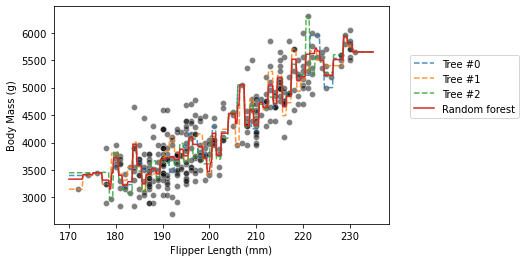

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)

# plot tree predictions
for tree_idx, predictions in enumerate(tree_predictions):
    plt.plot(data_range[feature_name], predictions, label=f"Tree #{tree_idx}",
             linestyle="--", alpha=0.8)

plt.plot(data_range[feature_name], forest_predictions, label=f"Random forest")
_ = plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")